## <div align="center"> PROJEK AKHIR MATA KULIAH MACHINE LEARNING </div>
## <div align="center"> PREDIKSI HARGA SAHAM PT SUMMARECON AGUNG TBK SEBAGAI INVESTASI JANGKA PANJANG</div>
<p><center><b></b><center> 
<p><center><b>Jose Veinsenli (00000053724)</b><center>



---

### Dataset yang diambil dari repositori:

1. [PT Summarecon Agung Tbk (SMRA.JK)] – sumber : [https://finance.yahoo.com/quote/SMRA.JK/history?p=SMRA.JK]

### Hasil kerja

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import math
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, f1_score, mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, Adagrad, Adamax, Adadelta
from sklearn.model_selection import GridSearchCV

In [3]:
smra = pd.read_excel('SMRA.xlsx')

In [4]:
smra

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-22,935,950,915,925,906,12902100
1,2018-03-23,905,920,880,915,896,22152400
2,2018-03-26,915,935,900,905,887,10657100
3,2018-03-27,915,920,905,910,892,13060300
4,2018-03-28,905,910,890,895,877,5801600
...,...,...,...,...,...,...,...
1247,2023-03-15,550,560,545,550,550,12743800
1248,2023-03-16,550,550,515,525,525,23894600
1249,2023-03-17,525,545,520,525,525,17400400
1250,2023-03-20,530,535,498,500,500,28111900


## Preprocessing

In [5]:
smra = smra.drop(columns=['Adj Close'])

In [6]:
smra.shape

(1252, 6)

In [7]:
smra.head(10)

,Date,Open,High,Low,Close,Volume
0,2018-03-22,935,950,915,925,12902100
1,2018-03-23,905,920,880,915,22152400
2,2018-03-26,915,935,900,905,10657100
3,2018-03-27,915,920,905,910,13060300
4,2018-03-28,905,910,890,895,5801600
5,2018-03-29,900,920,900,905,12567300
6,2018-03-30,905,905,905,905,0
7,2018-04-02,925,925,900,910,4766200
8,2018-04-03,890,910,890,900,12836400
9,2018-04-04,900,910,880,890,14475800


In [8]:
smra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1252 non-null   datetime64[ns]
 1   Open    1252 non-null   int64         
 2   High    1252 non-null   int64         
 3   Low     1252 non-null   int64         
 4   Close   1252 non-null   int64         
 5   Volume  1252 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 58.8 KB


In [9]:
smra.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
smra.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [11]:
smra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1252 non-null   datetime64[ns]
 1   Open    1252 non-null   int64         
 2   High    1252 non-null   int64         
 3   Low     1252 non-null   int64         
 4   Close   1252 non-null   int64         
 5   Volume  1252 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 58.8 KB


In [12]:
smra

,Date,Open,High,Low,Close,Volume
0,2018-03-22,935,950,915,925,12902100
1,2018-03-23,905,920,880,915,22152400
2,2018-03-26,915,935,900,905,10657100
3,2018-03-27,915,920,905,910,13060300
4,2018-03-28,905,910,890,895,5801600
...,...,...,...,...,...,...
1247,2023-03-15,550,560,545,550,12743800
1248,2023-03-16,550,550,515,525,23894600
1249,2023-03-17,525,545,520,525,17400400
1250,2023-03-20,530,535,498,500,28111900


In [13]:
smra.describe() 

,Open,High,Low,Close,Volume
count,1252.000000,1252.000000,1252.000000,1252.000000,1.252000e+03
mean,803.908147,820.401757,785.688498,801.700479,3.163677e+07
std,205.196251,208.320959,200.981458,205.320694,3.268015e+07
min,358.000000,370.000000,350.000000,356.000000,0.000000e+00
25%,620.000000,634.750000,605.000000,618.750000,1.142448e+07
50%,800.000000,815.000000,780.000000,795.000000,2.204750e+07
75%,944.250000,965.000000,925.000000,945.000000,4.034138e+07
max,1335.000000,1360.000000,1290.000000,1330.000000,3.428448e+08


### 

### Visualizing SMRA Stock

Text(0, 0.5, 'Prices ($)')

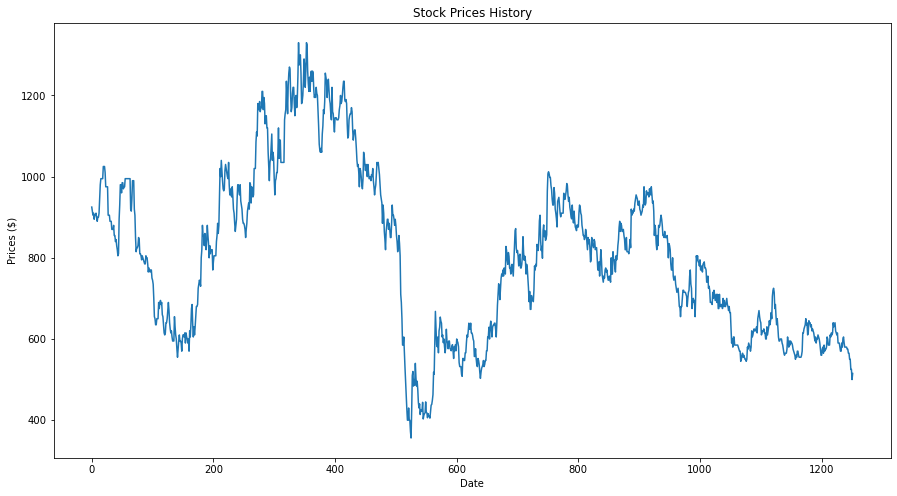

In [14]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(smra['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

### Train Test Data

In [15]:
close_prices = smra['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

mmscal = MinMaxScaler(feature_range=(0,1))
scaled_data = mmscal.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [16]:
test_data = scaled_data[training_data_len-30: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### Modeling

In [ ]:
look_back = 30

model = Sequential()
# Ada Hidden
model.add(LSTM(126,return_sequences=True, input_shape=(look_back, 1)))
model.add(Dense(72, activation='tanh'))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.summary()

optimizer = Adam(learning_rate = 0.01)

model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size= 68, epochs=75)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 126)           64512     
                                                                 
 dense (Dense)               (None, 30, 72)            9144      
                                                                 
 lstm_1 (LSTM)               (None, 64)                35072     
                                                                 
 dense_1 (Dense)             (None, 48)                3120      
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 111,897
Trainable params: 111,897
Non-trai

15/15 [==============================] - 1s 68ms/step - loss: 0.0035 - accuracy: 0.0031
Epoch 71/75
15/15 [==============================] - 1s 70ms/step - loss: 0.0036 - accuracy: 0.0031
Epoch 72/75
15/15 [==============================] - 1s 69ms/step - loss: 0.0036 - accuracy: 0.0031
Epoch 73/75
15/15 [==============================] - 1s 70ms/step - loss: 0.0034 - accuracy: 0.0031
Epoch 74/75
15/15 [==============================] - 1s 68ms/step - loss: 0.0031 - accuracy: 0.0031
Epoch 75/75
14/15 [===========================>..] - ETA: 0s - loss: 0.0035 - accuracy: 0.0032

### Evaluation

In [ ]:
predict = model.predict(x_test)
predict = mmscal.inverse_transform(predict)

r2 = r2_score(y_test, predict)
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mean_squared_error(y_test, predict))

print("Ini Nilai RMSE nya : ", rmse)
print("Ini Nilai MSE nya : ", mse)
print("Ini Nilai MAE nya : ", mae)
print("Ini Nilai R2 nya : ", r2)

### Visualization for Validation

In [ ]:
data = smra.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predict

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price Rupiah (Rp.)')
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
validation

***

### Save the notebook, then convert the notebook to html (by running the next code).

In [ ]:
!jupyter nbconvert --to html "./00000053724_Jose Veinsenli_SourceCode_UAS_IF540L.ipynb" --output-dir="./"